<a href="https://colab.research.google.com/github/utkarsh0702/Tensorflow/blob/master/tensorflow4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [5]:
x= np.array([-1.0,0.0,1.0,2.0,3.0,4.0], dtype= float)
y= np.array([-3.0,-1.0,1.0,3.0,5.0,7.0], dtype= float)

#creating model and training
model= keras.Sequential([keras.layers.Dense(1, input_shape=[1])
                        ])
model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(x,y, epochs=500)
model.predict([10.0])

Epoch 1/500
6/6 [==============================] - 1s 84ms/sample - loss: 25.3654
Epoch 2/500
6/6 [==============================] - 0s 396us/sample - loss: 20.2483
Epoch 3/500
6/6 [==============================] - 0s 277us/sample - loss: 16.2164
Epoch 4/500
6/6 [==============================] - 0s 458us/sample - loss: 13.0384
Epoch 5/500
6/6 [==============================] - 0s 353us/sample - loss: 10.5324
Epoch 6/500
6/6 [==============================] - 0s 353us/sample - loss: 8.5551
Epoch 7/500
6/6 [==============================] - 0s 231us/sample - loss: 6.9940
Epoch 8/500
6/6 [==============================] - 0s 226us/sample - loss: 5.7604
Epoch 9/500
6/6 [==============================] - 0s 225us/sample - loss: 4.7845
Epoch 10/500
6/6 [==============================] - 0s 227us/sample - loss: 4.0116
Epoch 11/500
6/6 [==============================] - 0s 245us/sample - loss: 3.3984
Epoch 12/500
6/6 [==============================] - 0s 226us/sample - loss: 2.9110
Epoch 13/

array([[18.979752]], dtype=float32)

In [6]:
#Neural Network for Fashion MNIST
fashion_mnist= keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

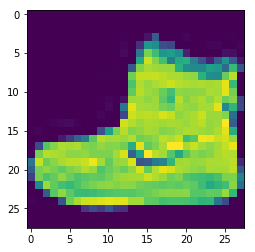

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_images[0])
print(train_labels[0])

#**Normalization**
To reduce the size of the 0 to 255 range image to 0 to 1 for the convience of the Neural Net. 

In [0]:
train_images= train_images/255.0
test_images= test_images/255.0

# **Terminologies**


1.   **Sequential -** It defines sequence of layers of neural network.
2.   **Flatten -** It takes the square matrix of an image and convert it into 1D matrix. 
3.   **Dense -** Adds a layer of neuron.
4.   **Relu -** It is an activation function that: If X>0 then X otherwise 0.
5.   **Softmax -** Find the max element from the array of output and convert the max element to 1 and others to 0.

In [0]:
# creating the model
model= keras.models.Sequential([keras.layers.Flatten(), 
                                keras.layers.Dense(128, activation= tf.nn.relu),
                                keras.layers.Dense(10, activation= tf.nn.softmax)
                               ])

In [12]:
model.compile(optimizer= tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy')

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4982
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3747
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3357
Epoch 4/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3134
Epoch 5/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2947


In [13]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.3474


0.34735001181960107

In [16]:
# to cancel the training in middle of epochs
class myCall(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.3):
      print('\nThe Training is Cancelled.....')
      self.model.stop_training= True

callbacks= myCall()
fashion_mnist= keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels)= fashion_mnist.load_data()
train_images= train_images/255.0
test_images= test_images/255.0
# creating the model
model= keras.models.Sequential([keras.layers.Flatten(), 
                                keras.layers.Dense(128, activation= tf.nn.relu),
                                keras.layers.Dense(10, activation= tf.nn.softmax)
                               ])

model.compile(optimizer= tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy')

model.fit(train_images, train_labels, epochs=7, callbacks=[callbacks])

Epoch 1/7
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4997
Epoch 2/7
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3767
Epoch 3/7
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3365
Epoch 4/7
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3112
Epoch 5/7
59264/60000 [============================>.] - ETA: 0s - loss: 0.2921
The Training is Cancelled.....
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2924
